In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df = pd.read_csv('Games.csv')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.7+ KB


In [49]:
df[0:20]

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic
5,World of Warcraft,14.0,Warcraft,Nov-04,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,Nov-04,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,May-15,Action role-playing,CD Projekt Red,CD Projekt
8,StarCraft,11.0,StarCraft,Mar-98,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
9,The Sims,11.0,The Sims,Feb-00,Life simulation,Maxis,Electronic Arts


In [50]:
d = pd.Series(df['Release'])
df['Month'] = d.str.split("-", expand = True)[0]
df['Year'] = d.str.split("-", expand = True)[1]

In [51]:
def months(Month):
    if  Month == 'Dec':
        Month = 12
    if Month == 'Nov':
        Month = 11
    if Month == 'Oct':
        Month = 10
    if Month == 'Sep':
        Month = 9
    if Month == 'Aug':
        Month = 8
    if Month == 'Jul':
        Month = 7
    if Month == 'Jun':
        Month = 6
    if Month == 'May':
        Month = 5
    if Month == 'April':
        Month = 4
    if Month == 'Mar':
        Month = 3
    if Month == 'Feb':
        Month = 2
    if Month == 'Jan':
        Month = 1
    return Month

In [52]:
df['Month'] = df['Month'].apply(months)

In [53]:
p = np.random.randint(15)
c = str(p)

In [54]:
df['Release_Date'] = df.Month.astype(str) + '/' + c + '/' + df.Year.astype(str)

In [55]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [56]:
df.drop(columns = ['Release','Month','Year'], axis = 1, inplace = True)
df = df.reindex(columns = ['Name','Release_Date','Sales','Series','Genre','Developer','Publisher'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          175 non-null    object        
 1   Release_Date  175 non-null    datetime64[ns]
 2   Sales         175 non-null    float64       
 3   Series        139 non-null    object        
 4   Genre         175 non-null    object        
 5   Developer     175 non-null    object        
 6   Publisher     175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.7+ KB


In [57]:
df[0:20]

,Name,Release_Date,Sales,Series,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,2017-12-07,42.0,NaN,Battle royale,PUBG Studios,Krafton
1,Minecraft,2011-11-07,33.0,Minecraft,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,2012-05-07,20.0,Diablo,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,2006-11-07,20.0,NaN,Sandbox,Facepunch Studios,Valve
4,Terraria,2011-05-07,17.2,NaN,Action-adventure,Re-Logic,Re-Logic
5,World of Warcraft,2004-11-07,14.0,Warcraft,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,2004-11-07,12.0,Half-Life,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,2015-05-07,12.0,The Witcher,Action role-playing,CD Projekt Red,CD Projekt
8,StarCraft,1998-03-07,11.0,StarCraft,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
9,The Sims,2000-02-07,11.0,The Sims,Life simulation,Maxis,Electronic Arts


In [58]:
df['Series'].value_counts()

Command & Conquer        5
StarCraft                4
Civilization             4
Age of Empires           4
Warcraft                 3
                        ..
Alice                    1
Ark: Survival Evolved    1
BioShock                 1
Commandos                1
Zoo Tycoon               1
Name: Series, Length: 91, dtype: int64

Text(0.5, 1.0, '판매량')

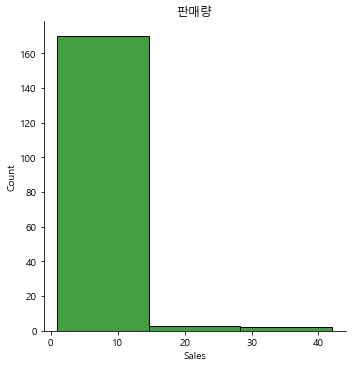

In [59]:
sns.displot(df.Sales, bins = 3, color = 'green') 
plt.rc('font',family = 'Malgun Gothic')
plt.title ('판매량')

Text(0.5, 1.0, '판매량')

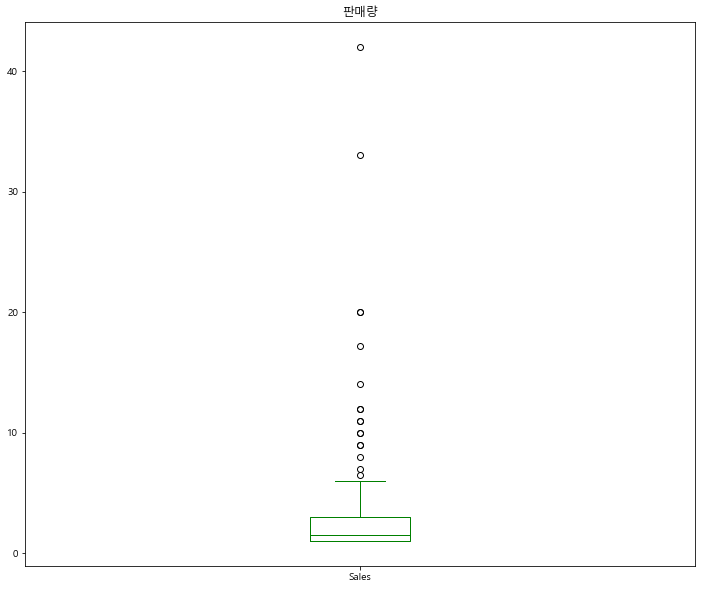

In [60]:
df.Sales.plot(kind = 'box', figsize = (12,10), color = 'green')
plt.rc('font',family = 'Malgun Gothic')
plt.title ('판매량')

Text(0.5, 1.0, '게임별 판매량')

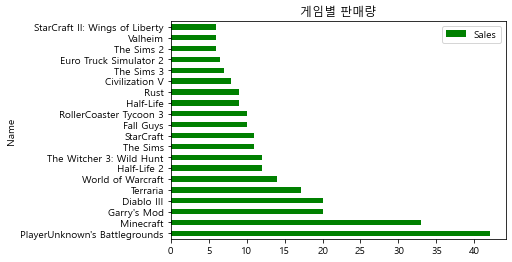

In [61]:
dr = pd.pivot_table(df, index = 'Name', values = ['Sales'], aggfunc = np.sum)
dr.sort_values(by = 'Sales', ascending = False).head(20).plot(kind = 'barh', color = 'green')
plt.rc('font',family = 'Malgun Gothic')
plt.title ('게임별 판매량')

Text(0.5, 1.0, '장르별 판매량')

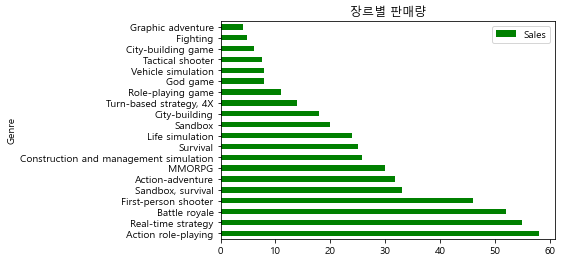

In [62]:
dr = pd.pivot_table(df, index = 'Genre', values = ['Sales'], aggfunc = np.sum)
dr.sort_values(by = 'Sales', ascending = False).head(20).plot(kind = 'barh', color = 'green')
plt.rc('font',family = 'Malgun Gothic')
plt.title ('장르별 판매량')

Text(0.5, 1.0, '장르별 판매량')

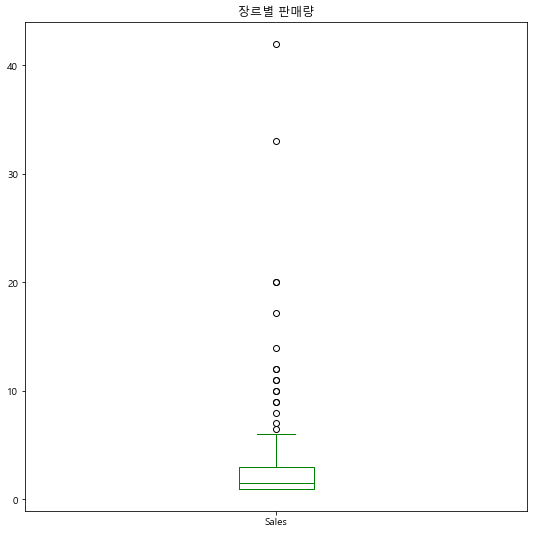

In [63]:
df.Sales.plot(kind = 'box', figsize = (9,9), color  = 'green')
plt.rc('font',family = 'Malgun Gothic')
plt.title ('장르별 판매량')

Text(0.5, 1.0, '장르별 게임개수')

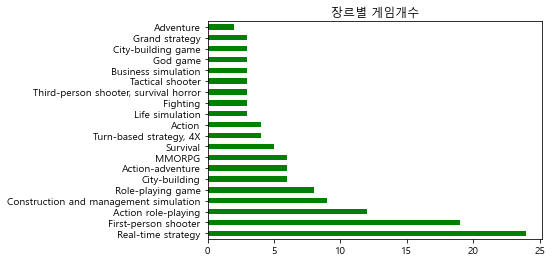

In [64]:
df.Genre.value_counts().head(20).plot(kind = 'barh', color = 'green')
plt.rc('font',family = 'Malgun Gothic')
plt.title ('장르별 게임개수')

In [65]:
df['Genre'].value_counts()

Real-time strategy                        24
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game                          8
                                          ..
Action role-playing game                   1
Maze, arcade                               1
Action-adventure, platformer               1
Action-adventure, Survival                 1
Space combat simulation                    1
Name: Genre, Length: 61, dtype: int64

Text(0.5, 1.0, '개발자별 판매량')

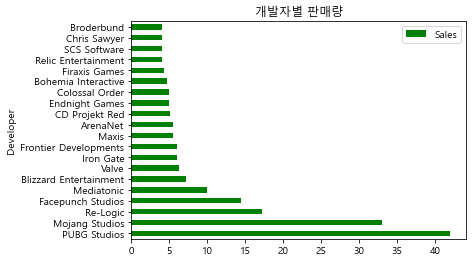

In [66]:
ptt = pd.pivot_table(df, index = 'Developer', values = ['Sales'])
ptt.sort_values(by = 'Sales', ascending = False).head(20).plot(color = 'green',kind = 'barh')
plt.rc('font',family = 'Malgun Gothic')
plt.title ('개발자별 판매량')

Text(0.5, 1.0, '개발자별 판매량')

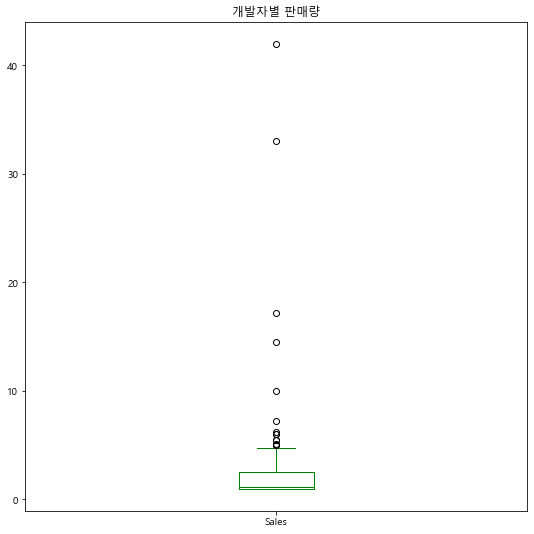

In [67]:
ptt.plot(kind = 'box', figsize = (9,9), color = 'green')
plt.rc('font',family = 'Malgun Gothic')
plt.title ('개발자별 판매량')

In [68]:
df = pd.read_csv('Games.csv')
df.head(20)

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic
5,World of Warcraft,14.0,Warcraft,Nov-04,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,Nov-04,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,May-15,Action role-playing,CD Projekt Red,CD Projekt
8,StarCraft,11.0,StarCraft,Mar-98,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
9,The Sims,11.0,The Sims,Feb-00,Life simulation,Maxis,Electronic Arts


In [69]:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [72]:
fig = px.treemap(df[0:20], 
                 path=['Name', 'Genre',], 
                 values='Sales'
                
                )
fig.show()